In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
import seaborn as sas

In [4]:
# import dataset and shuffle data
df = pd.read_csv('dataset_2.csv')
df = df.sample(frac=1).reset_index(drop=True)
df['Head Pressure'] = df['Head Pressure'].div(500)
df['Hip Bone Pressure'] = df['Hip Bone Pressure'].div(500)
df['Legs Pressure'] = df['Legs Pressure'].div(500)
df


,Head X,Head Y,Head Pressure,Hip Bone X,Hip Bone Y,Hip Bone Pressure,Legs X,Legs Y,Legs Pressure,Subject,Position
0,16.403846,8.365385,0.364567,14.142857,25.489796,0.304708,19.556962,44.518987,0.102477,6,2
1,16.000000,9.600000,0.474698,19.708333,28.291667,0.314728,6.500000,39.000000,0.286348,7,1
2,20.620690,9.275862,0.425135,17.419753,25.518519,0.341721,16.875000,51.406250,0.390677,2,2
3,16.892857,9.357143,0.304667,16.358974,24.512821,0.280806,14.552239,49.014925,0.152212,7,0
4,17.467742,9.790323,0.229950,15.753927,23.680628,0.154988,16.617647,51.852941,0.237165,7,0
...,...,...,...,...,...,...,...,...,...,...,...
2667,15.377358,10.037736,0.118124,14.359375,33.515625,0.455595,12.895833,39.500000,0.239686,10,0
2668,14.900000,6.600000,0.125988,21.699552,25.159193,0.023218,15.333333,62.333333,0.708824,5,0
2669,15.028571,9.400000,0.237643,15.284916,26.296089,0.217086,12.977444,45.112782,0.115019,10,0
2670,22.790123,6.662551,0.010623,17.000000,26.500000,0.783745,7.591743,50.114679,0.006112,12,0


In [5]:
# Split dataset in train, val and test
num_col = len(df.columns)
train_split = 2400
test_split = 2600

train_data = df.iloc[0:train_split, 0:num_col-2]
val_data = df.iloc[train_split:test_split, 0:num_col-2]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data_p = df.iloc[test_split:,:num_col-2]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data_p = np.array(test_data_p)
test_subject = np.array(test_subject)
test_position = np.array(test_position)

test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, 0:num_col-2]
    val_data = df.iloc[train_split:test_split, 0:num_col-2]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data_p = df.iloc[test_split:,:num_col-2]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data_p = np.array(test_data_p)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)


In [6]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)

print(train_data.shape)
print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)


(2400, 9)
(2400, 1)
(2400, 1)
(200, 9)
(200, 1)
(200, 1)


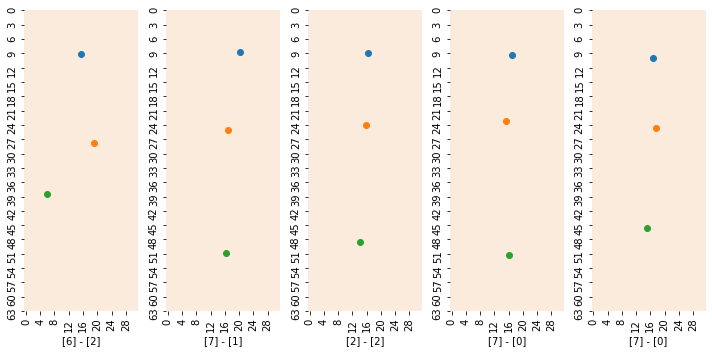

In [7]:
plt.figure(figsize=(10,5))
i = 0

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(train_subject[i-1]) + ' - ' + str(train_position[i-1])
    sas.heatmap(np.zeros(2048).reshape(64,32),  vmin=-2, cbar=False)
    plt.plot(train_data[i][0],train_data[i][1], 'o')
    plt.plot(train_data[i][3],train_data[i][4], 'o')
    plt.plot(train_data[i][6],train_data[i][7], 'o')
    plt.xlabel(label)

plt.tight_layout()
    

In [8]:
# normalize data and build categorical labels
train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [9]:
# model implementation
inp = 9

model_position = Sequential()
model_position.add(Dense(64, input_dim= inp, activation='relu'))
model_position.add(Flatten())
model_position.add(Dropout(0.4))
model_position.add(Dense(32, activation='relu'))
model_position.add(Dense(32, activation='relu'))
model_position.add(Dense(16, activation='relu'))
model_position.add(Dense(9, activation='relu'))

model_position.add(Dense(3, activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_position.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_position.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 1

In [11]:
#train subject model
history = History()

train_position = model_position.fit(train_data, train_position, validation_data = (val_data, val_position), epochs=250,  callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/250
2400/2400 [==============================] - 0s 130us/sample - loss: 1.0541 - acc: 0.5083 - val_loss: 1.0164 - val_acc: 0.5400
Epoch 2/250
2400/2400 [==============================] - 0s 57us/sample - loss: 1.0197 - acc: 0.5387 - val_loss: 1.0184 - val_acc: 0.5400
Epoch 3/250
2400/2400 [==============================] - 0s 59us/sample - loss: 1.0005 - acc: 0.5396 - val_loss: 0.9813 - val_acc: 0.5400
Epoch 4/250
2400/2400 [==============================] - 0s 53us/sample - loss: 0.9817 - acc: 0.5529 - val_loss: 0.9495 - val_acc: 0.5650
Epoch 5/250
2400/2400 [==============================] - 0s 58us/sample - loss: 0.9399 - acc: 0.5733 - val_loss: 0.8356 - val_acc: 0.6550
Epoch 6/250
2400/2400 [==============================] - 0s 54us/sample - loss: 0.8353 - acc: 0.6579 - val_loss: 0.7034 - val_acc: 0.7300
Epoch 7/250
2400/2400 [==============================] - 0s 52us/sample - loss: 0.7285 - acc: 0.7167 - val_loss: 0.5073 - va

2400/2400 [==============================] - 0s 69us/sample - loss: 0.2974 - acc: 0.9021 - val_loss: 0.2248 - val_acc: 0.9400
Epoch 60/250
2400/2400 [==============================] - 0s 59us/sample - loss: 0.2883 - acc: 0.9017 - val_loss: 0.2262 - val_acc: 0.9400
Epoch 61/250
2400/2400 [==============================] - 0s 50us/sample - loss: 0.2771 - acc: 0.9000 - val_loss: 0.1980 - val_acc: 0.9500
Epoch 62/250
2400/2400 [==============================] - 0s 64us/sample - loss: 0.2831 - acc: 0.9025 - val_loss: 0.2014 - val_acc: 0.9550
Epoch 63/250
2400/2400 [==============================] - 0s 68us/sample - loss: 0.2986 - acc: 0.8967 - val_loss: 0.2153 - val_acc: 0.9400
Epoch 64/250
2400/2400 [==============================] - 0s 46us/sample - loss: 0.2594 - acc: 0.9129 - val_loss: 0.2020 - val_acc: 0.9400
Epoch 65/250
2400/2400 [==============================] - 0s 47us/sample - loss: 0.2843 - acc: 0.9058 - val_loss: 0.1947 - val_acc: 0.9550
Epoch 66/250
2400/2400 [================

Epoch 118/250
2400/2400 [==============================] - 0s 50us/sample - loss: 0.2212 - acc: 0.9271 - val_loss: 0.2005 - val_acc: 0.9500
Epoch 119/250
2400/2400 [==============================] - 0s 46us/sample - loss: 0.2281 - acc: 0.9237 - val_loss: 0.2015 - val_acc: 0.9500
Epoch 120/250
2400/2400 [==============================] - 0s 44us/sample - loss: 0.2508 - acc: 0.9142 - val_loss: 0.2237 - val_acc: 0.9300
Epoch 121/250
2400/2400 [==============================] - 0s 45us/sample - loss: 0.2215 - acc: 0.9225 - val_loss: 0.2090 - val_acc: 0.9300
Epoch 122/250
2400/2400 [==============================] - 0s 44us/sample - loss: 0.2161 - acc: 0.9258 - val_loss: 0.1915 - val_acc: 0.9500
Epoch 123/250
2400/2400 [==============================] - 0s 49us/sample - loss: 0.2046 - acc: 0.9308 - val_loss: 0.2131 - val_acc: 0.9400
Epoch 124/250
2400/2400 [==============================] - 0s 49us/sample - loss: 0.2240 - acc: 0.9258 - val_loss: 0.1922 - val_acc: 0.9550
Epoch 125/250
2400/2

2400/2400 [==============================] - 0s 62us/sample - loss: 0.2138 - acc: 0.9292 - val_loss: 0.2187 - val_acc: 0.9400
Epoch 177/250
2400/2400 [==============================] - 0s 52us/sample - loss: 0.2179 - acc: 0.9300 - val_loss: 0.2295 - val_acc: 0.9250
Epoch 178/250
2400/2400 [==============================] - 0s 44us/sample - loss: 0.2151 - acc: 0.9204 - val_loss: 0.1809 - val_acc: 0.9550
Epoch 179/250
2400/2400 [==============================] - 0s 42us/sample - loss: 0.1960 - acc: 0.9287 - val_loss: 0.2222 - val_acc: 0.9350
Epoch 180/250
2400/2400 [==============================] - 0s 42us/sample - loss: 0.1916 - acc: 0.9333 - val_loss: 0.2131 - val_acc: 0.9500
Epoch 181/250
2400/2400 [==============================] - 0s 52us/sample - loss: 0.2054 - acc: 0.9296 - val_loss: 0.2301 - val_acc: 0.9300
Epoch 182/250
2400/2400 [==============================] - 0s 58us/sample - loss: 0.1943 - acc: 0.9342 - val_loss: 0.2089 - val_acc: 0.9450
Epoch 183/250
2400/2400 [=========

2400/2400 [==============================] - 0s 44us/sample - loss: 0.1935 - acc: 0.9358 - val_loss: 0.2145 - val_acc: 0.9500
Epoch 235/250
2400/2400 [==============================] - 0s 52us/sample - loss: 0.1804 - acc: 0.9358 - val_loss: 0.2400 - val_acc: 0.9450
Epoch 236/250
2400/2400 [==============================] - 0s 46us/sample - loss: 0.1670 - acc: 0.9417 - val_loss: 0.2054 - val_acc: 0.9550
Epoch 237/250
2400/2400 [==============================] - 0s 44us/sample - loss: 0.1909 - acc: 0.9321 - val_loss: 0.2400 - val_acc: 0.9350
Epoch 238/250
2400/2400 [==============================] - 0s 44us/sample - loss: 0.1748 - acc: 0.9400 - val_loss: 0.2539 - val_acc: 0.9150
Epoch 239/250
2400/2400 [==============================] - 0s 43us/sample - loss: 0.1726 - acc: 0.9388 - val_loss: 0.2003 - val_acc: 0.9500
Epoch 240/250
2400/2400 [==============================] - 0s 45us/sample - loss: 0.1874 - acc: 0.9367 - val_loss: 0.2898 - val_acc: 0.9000
Epoch 241/250
2400/2400 [=========

72/72 [==============================] - 0s 43us/sample - loss: 0.2719 - acc: 0.9028
[1 1 0 0 1 2 0 1 0 2]


,Position
2600,0
2601,1
2602,0
2603,0
2604,1
2605,2
2606,0
2607,1
2608,0
2609,2


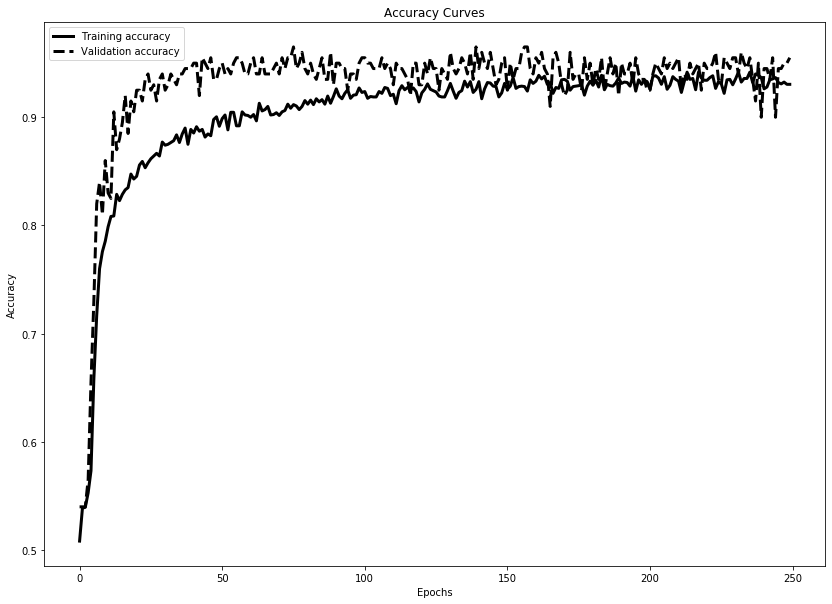

In [13]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


model_position.evaluate(test_data_p, test_position)

predictions_position = model_position.predict(test_data_p)
predictions_position = predictions_position.argmax(axis=-1)
print(predictions_position[:10])

test_labels = df.iloc[test_split:, num_col-1:num_col]
test_labels.head(10)


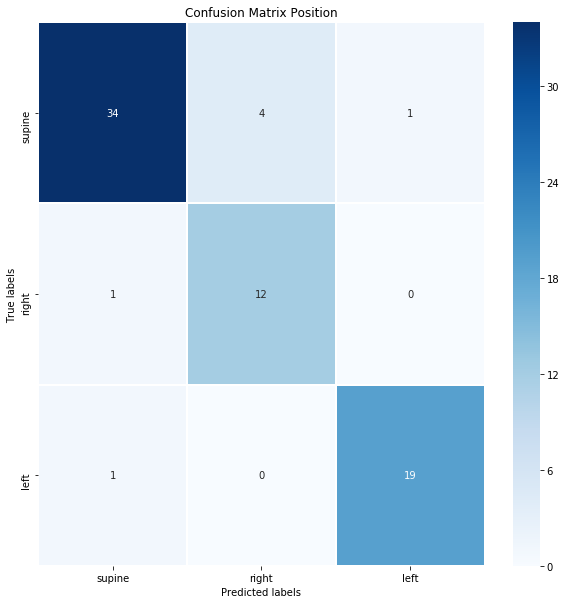

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_position = model_position.predict(test_data_p)
predictions_position = predictions_position.argmax(axis=-1)
labels = ['supine', 'right', 'left']
test_labels = df.iloc[test_split:, num_col-1:num_col]
cm = confusion_matrix(test_labels, predictions_position, [0,1,2])

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, ax = ax, linewidths=1, fmt = 'd', cmap = "Blues"); #annot=True to annotate cells
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Position'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [39]:
# Split dataset in train, val and test
num_col = len(df.columns)
train_split = 2400
test_split = 2600

train_data = df.iloc[0:train_split, [2,5,8]]
val_data = df.iloc[train_split:test_split, [2,5,8]]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data_s = df.iloc[test_split:,[2,5,8]]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data_s = np.array(test_data_s)
test_subject = np.array(test_subject)
test_position = np.array(test_position)
test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, [2,5,8]]
    val_data = df.iloc[train_split:test_split, [2,5,8]]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data_s = df.iloc[test_split:,[2,5,8]]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data_s = np.array(test_data_s)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)
    

In [40]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)

print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)


(2400, 1)
(2400, 1)
(200, 3)
(200, 1)
(200, 1)


In [41]:
# normalize data and build categorical labels
train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [42]:
# model subject
model_subject = Sequential()
model_subject.add(Dense(128, input_dim= 3, activation='relu'))
model_subject.add(Flatten())
model_subject.add(Dropout(0.4))
model_subject.add(Dense(64, activation='relu'))
model_subject.add(Dense(32, activation='relu'))
model_subject.add(Dense(32, activation='relu'))
model_subject.add(Dense(16, activation='relu'))
model_subject.add(Dense(9, activation='relu'))

model_subject.add(Dense(13, activation='softmax'))


In [43]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_subject.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_subject.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               512       
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 16)               

In [44]:
#train position model
history = History()

train_subject = model_subject.fit(train_data, train_subject, validation_data = (val_data, val_subject), epochs=1000, batch_size = 8, callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/1000
2400/2400 [==============================] - 1s 343us/sample - loss: 2.5618 - acc: 0.0783 - val_loss: 2.5437 - val_acc: 0.0850
Epoch 2/1000
2400/2400 [==============================] - 1s 221us/sample - loss: 2.5341 - acc: 0.1037 - val_loss: 2.5019 - val_acc: 0.0850
Epoch 3/1000
2400/2400 [==============================] - 1s 230us/sample - loss: 2.4991 - acc: 0.1121 - val_loss: 2.4777 - val_acc: 0.1000
Epoch 4/1000
2400/2400 [==============================] - 1s 234us/sample - loss: 2.4741 - acc: 0.1013 - val_loss: 2.4613 - val_acc: 0.1100
Epoch 5/1000
2400/2400 [==============================] - 1s 231us/sample - loss: 2.4571 - acc: 0.1138 - val_loss: 2.4498 - val_acc: 0.1050
Epoch 6/1000
2400/2400 [==============================] - 1s 250us/sample - loss: 2.4494 - acc: 0.1150 - val_loss: 2.4440 - val_acc: 0.1250
Epoch 7/1000
2400/2400 [==============================] - 1s 277us/sample - loss: 2.4473 - acc: 0.1133 - val_loss

Epoch 59/1000
2400/2400 [==============================] - 0s 208us/sample - loss: 1.9919 - acc: 0.2917 - val_loss: 1.9442 - val_acc: 0.3600
Epoch 60/1000
2400/2400 [==============================] - 0s 206us/sample - loss: 1.9830 - acc: 0.3067 - val_loss: 1.9806 - val_acc: 0.2950
Epoch 61/1000
2400/2400 [==============================] - 0s 206us/sample - loss: 1.9857 - acc: 0.2996 - val_loss: 1.9171 - val_acc: 0.3650
Epoch 62/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 1.9854 - acc: 0.3129 - val_loss: 1.8932 - val_acc: 0.3550
Epoch 63/1000
2400/2400 [==============================] - 1s 209us/sample - loss: 1.9760 - acc: 0.3025 - val_loss: 1.9057 - val_acc: 0.3550
Epoch 64/1000
2400/2400 [==============================] - 1s 210us/sample - loss: 1.9491 - acc: 0.3137 - val_loss: 1.8791 - val_acc: 0.3900
Epoch 65/1000
2400/2400 [==============================] - 1s 209us/sample - loss: 1.9395 - acc: 0.3237 - val_loss: 1.8682 - val_acc: 0.3800
Epoch 66/1000

Epoch 117/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.6212 - acc: 0.4467 - val_loss: 1.5441 - val_acc: 0.4900
Epoch 118/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.6516 - acc: 0.4404 - val_loss: 1.5731 - val_acc: 0.4800
Epoch 119/1000
2400/2400 [==============================] - 0s 196us/sample - loss: 1.6685 - acc: 0.4279 - val_loss: 1.5401 - val_acc: 0.4950
Epoch 120/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.6336 - acc: 0.4387 - val_loss: 1.5500 - val_acc: 0.4750
Epoch 121/1000
2400/2400 [==============================] - 1s 209us/sample - loss: 1.6055 - acc: 0.4567 - val_loss: 1.6479 - val_acc: 0.4300
Epoch 122/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 1.6037 - acc: 0.4579 - val_loss: 1.5571 - val_acc: 0.4650
Epoch 123/1000
2400/2400 [==============================] - 0s 205us/sample - loss: 1.6216 - acc: 0.4429 - val_loss: 1.5838 - val_acc: 0.4800
Epoch 

Epoch 175/1000
2400/2400 [==============================] - 0s 208us/sample - loss: 1.4643 - acc: 0.5017 - val_loss: 1.3652 - val_acc: 0.5700
Epoch 176/1000
2400/2400 [==============================] - 1s 214us/sample - loss: 1.4685 - acc: 0.5150 - val_loss: 1.4070 - val_acc: 0.5850
Epoch 177/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.4713 - acc: 0.4996 - val_loss: 1.4311 - val_acc: 0.5000
Epoch 178/1000
2400/2400 [==============================] - 0s 205us/sample - loss: 1.4543 - acc: 0.5025 - val_loss: 1.3790 - val_acc: 0.5850
Epoch 179/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 1.4369 - acc: 0.5042 - val_loss: 1.3819 - val_acc: 0.5700
Epoch 180/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.4602 - acc: 0.4963 - val_loss: 1.4365 - val_acc: 0.5650
Epoch 181/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.4832 - acc: 0.4904 - val_loss: 1.4136 - val_acc: 0.5350
Epoch 

Epoch 233/1000
2400/2400 [==============================] - 1s 209us/sample - loss: 1.3260 - acc: 0.5508 - val_loss: 1.2999 - val_acc: 0.6200
Epoch 234/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.3584 - acc: 0.5350 - val_loss: 1.3714 - val_acc: 0.5850
Epoch 235/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.3517 - acc: 0.5462 - val_loss: 1.3718 - val_acc: 0.5600
Epoch 236/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.3707 - acc: 0.5337 - val_loss: 1.3325 - val_acc: 0.6200
Epoch 237/1000
2400/2400 [==============================] - 0s 206us/sample - loss: 1.3260 - acc: 0.5446 - val_loss: 1.2910 - val_acc: 0.5950
Epoch 238/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.3203 - acc: 0.5583 - val_loss: 1.3097 - val_acc: 0.5900
Epoch 239/1000
2400/2400 [==============================] - 0s 204us/sample - loss: 1.3383 - acc: 0.5483 - val_loss: 1.3160 - val_acc: 0.5950
Epoch 

Epoch 291/1000
2400/2400 [==============================] - 0s 205us/sample - loss: 1.2912 - acc: 0.5671 - val_loss: 1.1874 - val_acc: 0.6050
Epoch 292/1000
2400/2400 [==============================] - 0s 201us/sample - loss: 1.2825 - acc: 0.5654 - val_loss: 1.3318 - val_acc: 0.5950
Epoch 293/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.2741 - acc: 0.5708 - val_loss: 1.2423 - val_acc: 0.6300
Epoch 294/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.2470 - acc: 0.5721 - val_loss: 1.1950 - val_acc: 0.6400
Epoch 295/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.2694 - acc: 0.5654 - val_loss: 1.2270 - val_acc: 0.6400
Epoch 296/1000
2400/2400 [==============================] - 0s 201us/sample - loss: 1.2989 - acc: 0.5617 - val_loss: 1.2501 - val_acc: 0.6400
Epoch 297/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.2513 - acc: 0.5721 - val_loss: 1.2008 - val_acc: 0.6750
Epoch 

Epoch 349/1000
2400/2400 [==============================] - 0s 206us/sample - loss: 1.1957 - acc: 0.6012 - val_loss: 1.1785 - val_acc: 0.6600
Epoch 350/1000
2400/2400 [==============================] - 1s 228us/sample - loss: 1.1942 - acc: 0.5929 - val_loss: 1.1250 - val_acc: 0.6500
Epoch 351/1000
2400/2400 [==============================] - 0s 197us/sample - loss: 1.1568 - acc: 0.5975 - val_loss: 1.1705 - val_acc: 0.6700
Epoch 352/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.1760 - acc: 0.6025 - val_loss: 1.1758 - val_acc: 0.6950
Epoch 353/1000
2400/2400 [==============================] - 1s 231us/sample - loss: 1.1885 - acc: 0.5979 - val_loss: 1.1727 - val_acc: 0.6850
Epoch 354/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.1837 - acc: 0.6021 - val_loss: 1.1311 - val_acc: 0.6900
Epoch 355/1000
2400/2400 [==============================] - 0s 207us/sample - loss: 1.1967 - acc: 0.5854 - val_loss: 1.1320 - val_acc: 0.6950
Epoch 

Epoch 407/1000
2400/2400 [==============================] - 0s 201us/sample - loss: 1.1223 - acc: 0.6108 - val_loss: 1.1293 - val_acc: 0.6650
Epoch 408/1000
2400/2400 [==============================] - 1s 217us/sample - loss: 1.1227 - acc: 0.6067 - val_loss: 1.1074 - val_acc: 0.6600
Epoch 409/1000
2400/2400 [==============================] - 1s 218us/sample - loss: 1.1200 - acc: 0.6150 - val_loss: 1.0399 - val_acc: 0.7200
Epoch 410/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 1.1212 - acc: 0.6175 - val_loss: 1.0745 - val_acc: 0.6950
Epoch 411/1000
2400/2400 [==============================] - 0s 205us/sample - loss: 1.1420 - acc: 0.6162 - val_loss: 1.1167 - val_acc: 0.6350
Epoch 412/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.1316 - acc: 0.6162 - val_loss: 1.1545 - val_acc: 0.6700
Epoch 413/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 1.1696 - acc: 0.5904 - val_loss: 1.0408 - val_acc: 0.7100
Epoch 

Epoch 465/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.0518 - acc: 0.6313 - val_loss: 1.0797 - val_acc: 0.6800
Epoch 466/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.0810 - acc: 0.6321 - val_loss: 1.0218 - val_acc: 0.7100
Epoch 467/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.0712 - acc: 0.6346 - val_loss: 1.0760 - val_acc: 0.6600
Epoch 468/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.0949 - acc: 0.6271 - val_loss: 1.1960 - val_acc: 0.6450
Epoch 469/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.0981 - acc: 0.6354 - val_loss: 1.0503 - val_acc: 0.7150
Epoch 470/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.1158 - acc: 0.6233 - val_loss: 1.0736 - val_acc: 0.7100
Epoch 471/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.1350 - acc: 0.6162 - val_loss: 1.0835 - val_acc: 0.6650
Epoch 

Epoch 523/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 1.0588 - acc: 0.6383 - val_loss: 0.9929 - val_acc: 0.7000
Epoch 524/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.0387 - acc: 0.6463 - val_loss: 1.0200 - val_acc: 0.7350
Epoch 525/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.0458 - acc: 0.6408 - val_loss: 1.0493 - val_acc: 0.7100
Epoch 526/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.0605 - acc: 0.6350 - val_loss: 1.0236 - val_acc: 0.7100
Epoch 527/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.0692 - acc: 0.6313 - val_loss: 1.0652 - val_acc: 0.7100
Epoch 528/1000
2400/2400 [==============================] - 0s 201us/sample - loss: 1.0452 - acc: 0.6471 - val_loss: 1.0686 - val_acc: 0.6700
Epoch 529/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 1.0372 - acc: 0.6471 - val_loss: 1.0171 - val_acc: 0.7300
Epoch 

Epoch 581/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 0.9983 - acc: 0.6608 - val_loss: 0.9612 - val_acc: 0.7150
Epoch 582/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.0021 - acc: 0.6508 - val_loss: 1.0380 - val_acc: 0.6750
Epoch 583/1000
2400/2400 [==============================] - 0s 202us/sample - loss: 1.0040 - acc: 0.6546 - val_loss: 1.0537 - val_acc: 0.7000
Epoch 584/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.0544 - acc: 0.6579 - val_loss: 0.9998 - val_acc: 0.7350
Epoch 585/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.0040 - acc: 0.6479 - val_loss: 0.9778 - val_acc: 0.7250
Epoch 586/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.0120 - acc: 0.6450 - val_loss: 0.9855 - val_acc: 0.7400
Epoch 587/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 1.0250 - acc: 0.6442 - val_loss: 1.0209 - val_acc: 0.7200
Epoch 

Epoch 639/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 0.9892 - acc: 0.6696 - val_loss: 1.0017 - val_acc: 0.7100
Epoch 640/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 1.0238 - acc: 0.6508 - val_loss: 1.0151 - val_acc: 0.6550
Epoch 641/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 0.9583 - acc: 0.6671 - val_loss: 0.9602 - val_acc: 0.7400
Epoch 642/1000
2400/2400 [==============================] - 0s 202us/sample - loss: 0.9804 - acc: 0.6575 - val_loss: 1.0279 - val_acc: 0.7250
Epoch 643/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 1.0267 - acc: 0.6583 - val_loss: 1.0931 - val_acc: 0.6950
Epoch 644/1000
2400/2400 [==============================] - 0s 201us/sample - loss: 1.0179 - acc: 0.6533 - val_loss: 1.0410 - val_acc: 0.7100
Epoch 645/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 1.0030 - acc: 0.6662 - val_loss: 1.0470 - val_acc: 0.7200
Epoch 

Epoch 697/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 0.9887 - acc: 0.6683 - val_loss: 0.9404 - val_acc: 0.7450
Epoch 698/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 0.9742 - acc: 0.6629 - val_loss: 0.9960 - val_acc: 0.7050
Epoch 699/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 0.9505 - acc: 0.6812 - val_loss: 0.9764 - val_acc: 0.7300
Epoch 700/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 0.9613 - acc: 0.6742 - val_loss: 0.9931 - val_acc: 0.7000
Epoch 701/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 0.9287 - acc: 0.6771 - val_loss: 0.9299 - val_acc: 0.7900
Epoch 702/1000
2400/2400 [==============================] - 1s 209us/sample - loss: 0.9685 - acc: 0.6625 - val_loss: 0.9978 - val_acc: 0.7550
Epoch 703/1000
2400/2400 [==============================] - 0s 207us/sample - loss: 0.9434 - acc: 0.6771 - val_loss: 0.9451 - val_acc: 0.7650
Epoch 

Epoch 755/1000
2400/2400 [==============================] - 1s 213us/sample - loss: 0.9649 - acc: 0.6737 - val_loss: 0.9321 - val_acc: 0.7350
Epoch 756/1000
2400/2400 [==============================] - 0s 205us/sample - loss: 0.9624 - acc: 0.6642 - val_loss: 0.9257 - val_acc: 0.7650
Epoch 757/1000
2400/2400 [==============================] - 1s 209us/sample - loss: 0.9612 - acc: 0.6800 - val_loss: 0.9421 - val_acc: 0.7200
Epoch 758/1000
2400/2400 [==============================] - 0s 206us/sample - loss: 0.9417 - acc: 0.6779 - val_loss: 0.9398 - val_acc: 0.7800
Epoch 759/1000
2400/2400 [==============================] - 0s 205us/sample - loss: 0.9585 - acc: 0.6754 - val_loss: 0.9454 - val_acc: 0.7850
Epoch 760/1000
2400/2400 [==============================] - 1s 210us/sample - loss: 0.9523 - acc: 0.6862 - val_loss: 0.9808 - val_acc: 0.7300
Epoch 761/1000
2400/2400 [==============================] - 0s 208us/sample - loss: 0.9462 - acc: 0.6717 - val_loss: 0.9105 - val_acc: 0.7400
Epoch 

Epoch 813/1000
2400/2400 [==============================] - 0s 205us/sample - loss: 0.9417 - acc: 0.6829 - val_loss: 0.9884 - val_acc: 0.7350
Epoch 814/1000
2400/2400 [==============================] - 0s 202us/sample - loss: 0.9428 - acc: 0.6875 - val_loss: 1.0000 - val_acc: 0.7150
Epoch 815/1000
2400/2400 [==============================] - 0s 200us/sample - loss: 0.9219 - acc: 0.6829 - val_loss: 0.9621 - val_acc: 0.8000
Epoch 816/1000
2400/2400 [==============================] - 0s 205us/sample - loss: 0.9345 - acc: 0.6808 - val_loss: 1.0160 - val_acc: 0.7250
Epoch 817/1000
2400/2400 [==============================] - 1s 209us/sample - loss: 0.9262 - acc: 0.6833 - val_loss: 1.0345 - val_acc: 0.7250
Epoch 818/1000
2400/2400 [==============================] - 0s 201us/sample - loss: 0.9235 - acc: 0.6979 - val_loss: 0.9476 - val_acc: 0.7800
Epoch 819/1000
2400/2400 [==============================] - 1s 211us/sample - loss: 0.9327 - acc: 0.6729 - val_loss: 1.0192 - val_acc: 0.7550
Epoch 

Epoch 871/1000
2400/2400 [==============================] - 0s 197us/sample - loss: 0.9249 - acc: 0.6875 - val_loss: 0.9050 - val_acc: 0.7850
Epoch 872/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 0.8678 - acc: 0.7033 - val_loss: 0.9056 - val_acc: 0.7650
Epoch 873/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 0.9131 - acc: 0.6817 - val_loss: 0.9828 - val_acc: 0.7650
Epoch 874/1000
2400/2400 [==============================] - 0s 196us/sample - loss: 0.9319 - acc: 0.6787 - val_loss: 0.9687 - val_acc: 0.7750
Epoch 875/1000
2400/2400 [==============================] - 0s 202us/sample - loss: 0.9193 - acc: 0.6796 - val_loss: 0.9553 - val_acc: 0.7250
Epoch 876/1000
2400/2400 [==============================] - 0s 202us/sample - loss: 0.9004 - acc: 0.7013 - val_loss: 0.9065 - val_acc: 0.7700
Epoch 877/1000
2400/2400 [==============================] - 0s 199us/sample - loss: 0.9402 - acc: 0.6867 - val_loss: 0.9018 - val_acc: 0.7350
Epoch 

Epoch 929/1000
2400/2400 [==============================] - 0s 198us/sample - loss: 0.8633 - acc: 0.7113 - val_loss: 0.9166 - val_acc: 0.7700
Epoch 930/1000
2400/2400 [==============================] - 0s 201us/sample - loss: 0.8860 - acc: 0.6925 - val_loss: 0.9338 - val_acc: 0.7400
Epoch 931/1000
2400/2400 [==============================] - 0s 204us/sample - loss: 0.9111 - acc: 0.6933 - val_loss: 0.9415 - val_acc: 0.7700
Epoch 932/1000
2400/2400 [==============================] - 0s 208us/sample - loss: 0.9073 - acc: 0.6896 - val_loss: 0.9381 - val_acc: 0.8000
Epoch 933/1000
2400/2400 [==============================] - 1s 217us/sample - loss: 0.8803 - acc: 0.7067 - val_loss: 0.9326 - val_acc: 0.7700
Epoch 934/1000
2400/2400 [==============================] - 1s 218us/sample - loss: 0.9041 - acc: 0.7054 - val_loss: 0.9618 - val_acc: 0.7750
Epoch 935/1000
2400/2400 [==============================] - 1s 212us/sample - loss: 0.8726 - acc: 0.6954 - val_loss: 0.9008 - val_acc: 0.7800
Epoch 

Epoch 987/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 0.8717 - acc: 0.7038 - val_loss: 0.9965 - val_acc: 0.7550
Epoch 988/1000
2400/2400 [==============================] - 0s 203us/sample - loss: 0.9419 - acc: 0.6821 - val_loss: 0.9427 - val_acc: 0.7750
Epoch 989/1000
2400/2400 [==============================] - 1s 217us/sample - loss: 0.8883 - acc: 0.7008 - val_loss: 0.9278 - val_acc: 0.7750
Epoch 990/1000
2400/2400 [==============================] - 0s 207us/sample - loss: 0.8226 - acc: 0.7175 - val_loss: 0.9527 - val_acc: 0.7600
Epoch 991/1000
2400/2400 [==============================] - 1s 284us/sample - loss: 0.8589 - acc: 0.7029 - val_loss: 1.0320 - val_acc: 0.7600
Epoch 992/1000
2400/2400 [==============================] - 1s 274us/sample - loss: 0.9041 - acc: 0.6963 - val_loss: 0.9236 - val_acc: 0.7900
Epoch 993/1000
2400/2400 [==============================] - 1s 316us/sample - loss: 0.8720 - acc: 0.6979 - val_loss: 1.0383 - val_acc: 0.7400
Epoch 

72/72 [==============================] - 0s 97us/sample - loss: 0.8591 - acc: 0.7222
[6 7 4 1 9 0 5 8 2 7]


,Subject
2600,9
2601,7
2602,2
2603,8
2604,9
2605,0
2606,5
2607,8
2608,2
2609,7


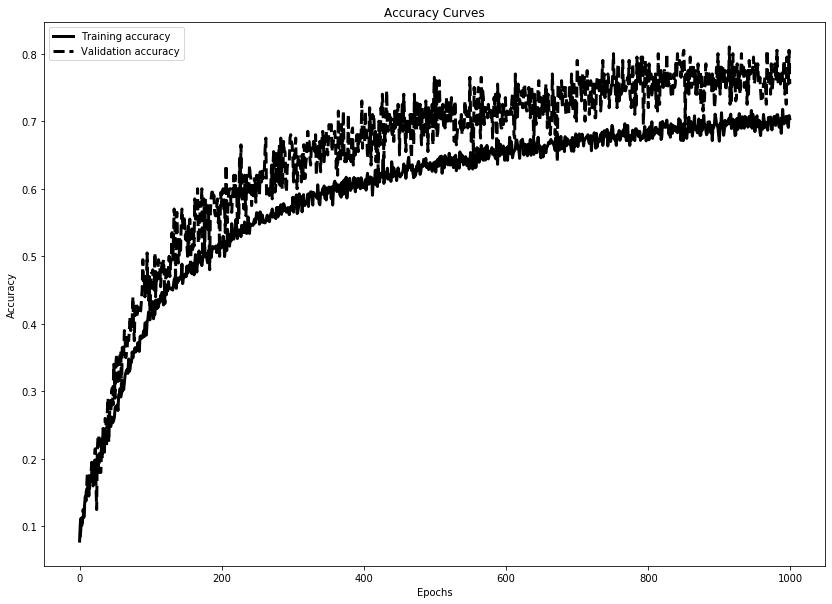

In [45]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

model_subject.evaluate(test_data_s, test_subject)

predictions_subject = model_subject.predict(test_data_s)
predictions_subject = predictions_subject.argmax(axis=-1)
print(predictions_subject[:10])

test_labels = df.iloc[test_split:, num_col-2:num_col-1]
test_labels.head(10)


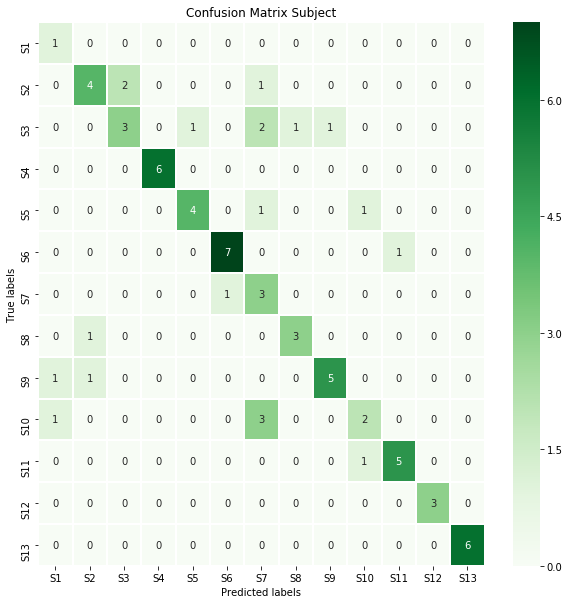

In [46]:
predictions_subject = model_subject.predict(test_data_s)
predictions_subject = predictions_subject.argmax(axis=-1)

labels = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6','S7', 'S8', 'S9','S10', 'S11', 'S12','S13']
test_labels = df.iloc[test_split:, num_col-2:num_col-1]
cm = confusion_matrix(test_labels, predictions_subject, [0,1,2,3,4,5,6,7,8,9,10,11,12])

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, ax = ax, linewidths=1, fmt = 'd', cmap="Greens"); #annot=True to annotate cells
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Subject'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [18]:
#save model and architecture to single file
model_subject.save("model_subject_2.h5")
model_position.save("model_position_2.h5")

with open('test_2.pkl', 'wb') as f: 
    pickle.dump([test_data_s, test_data_p, test_subject, test_position], f)
    